# Código recurso para generar figuras que introducir luego en el documento del trabajo.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### ReLU

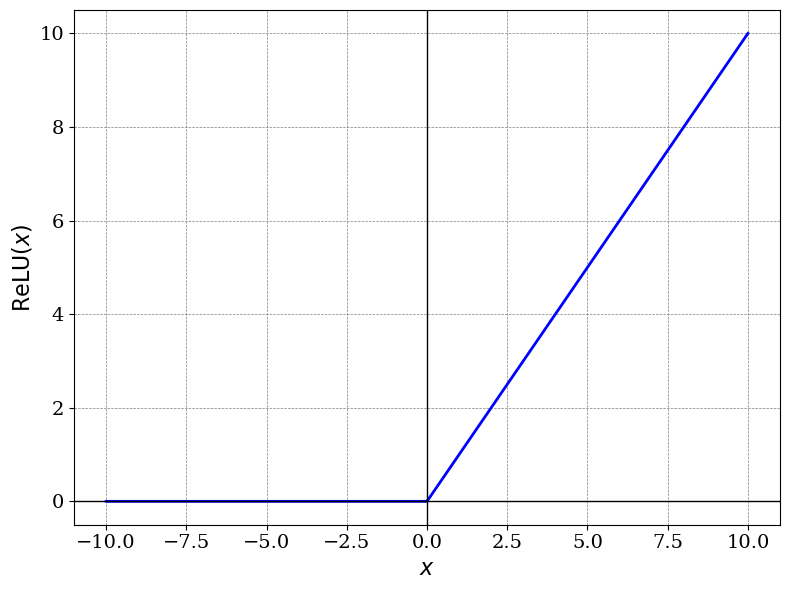

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función ReLU
def relu(x):
    return np.maximum(0, x)

# Crear un rango de valores para x
x = np.linspace(-10, 10, 400)
y = relu(x)

# Configuración de la figura para publicación científica
plt.figure(figsize=(8, 6))

# Graficar la función ReLU
plt.plot(x, y, label='ReLU(x)', color='blue', linewidth=2)

# Etiquetas de los ejes
plt.xlabel(r'$x$', fontsize=16, fontname='serif')
plt.ylabel(r'$\mathrm{ReLU}(x)$', fontsize=16, fontname='serif')

# Líneas de referencia en los ejes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Configuración de la cuadrícula
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Ajuste del tamaño de los ticks
plt.xticks(fontsize=14, fontname='serif')
plt.yticks(fontsize=14, fontname='serif')

# Ajustar márgenes para evitar cortes en etiquetas
plt.tight_layout()

# Guardar la imagen en alta calidad
plt.savefig("relu_function.pdf", format="pdf", dpi=300)

# Mostrar el gráfico
plt.show()
